<a href="https://colab.research.google.com/github/ShovalBenjer/Product_Recommendation_Forecasting/blob/main/Copy_of_Insait_DS_candidates'_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Greetings!
> You received this jupyter notebook as we believe this can be a great fit. <br>
> The goal of this notebook is to understand our challenges better <br> and assess your proficiency in python & pandas.

### Several remarks:
* You are welcome to use the internet, consult, and use any available sources.
* There is no time limit, and we do not monitor any versioning or pace. Take your time and have fun.
* The notebook should take up to two hours. If it takes more than that, please reach out.
We tried to create an intriguing assignment. If you have any feedback - we'll be happy to hear.
* A text cell decorated with "👷" will be followed by a code cell you are welcome to fill in.

### **Make sure the notebook runs end to end before submission**

# **The products recommendation notebook**
The data at hand represents 12,000 bank clients and their monthly financial status.
<br> The data is featured as a tabular schema, where each row contains 48 features.
>The first 24 features are client-level entities such as age, residence country, and the joining channel.
<br>The last 24 features are the **products** the client owns in a specified month (`Status_Dt`).

Our task is to *forecast* which products a client will add or remove next month, given that we have all past information on the client.

TL;DR



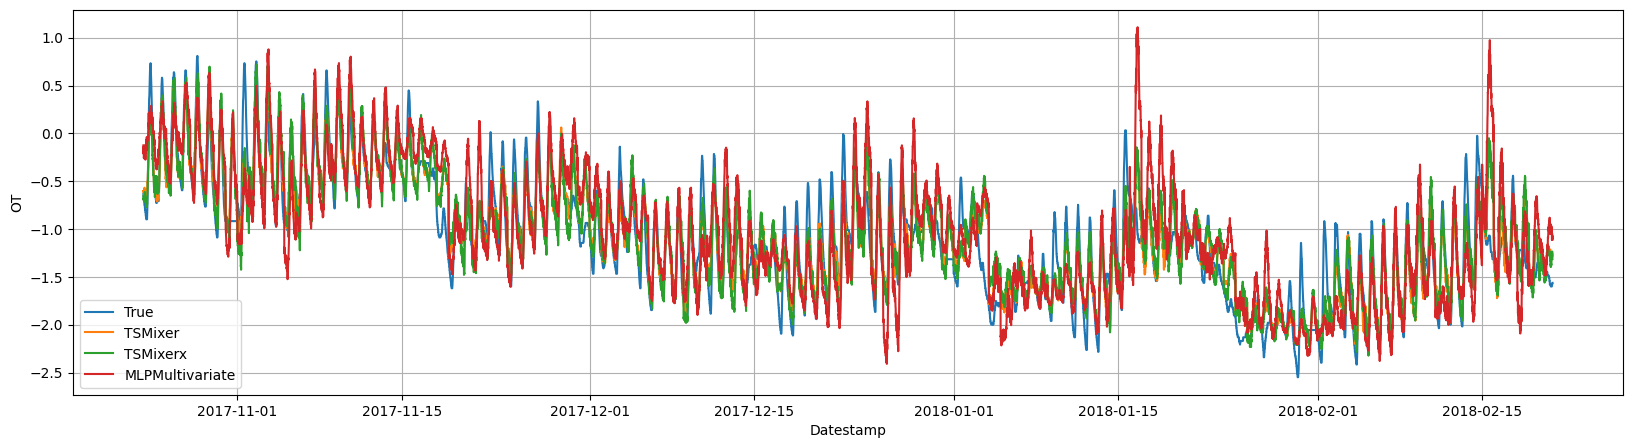

# Logistics

In [177]:
# You will probably need to run this cell twice,
# as google colab has runtime issues after installing some libraries
# (press the "Restart runtime" button in the output cell)
!pip install --upgrade gdown

In [178]:
# Download and extract the dataset
!rm -rf sample_data
!mkdir data & gdown 1DkOvf0LaRgCVfLEtHXr5ztaHhGN4-tDu -O data/features_products.zip
!unzip data/features_products.zip -d data/features_products
!find . -name "*.zip" ! -iname features_products.zip | while read filename; do unzip -o -d "`dirname "$filename"`" "$filename"; done;
!find . -name "*.zip" -delete

mkdir: cannot create directory ‘data’: File exists
Downloading...
From (original): https://drive.google.com/uc?id=1DkOvf0LaRgCVfLEtHXr5ztaHhGN4-tDu
From (redirected): https://drive.google.com/uc?id=1DkOvf0LaRgCVfLEtHXr5ztaHhGN4-tDu&confirm=t&uuid=770dda3e-eba1-4a69-9b2e-b88c2c21e347
To: /content/data/features_products.zip
100% 240M/240M [00:08<00:00, 29.7MB/s]
Archive:  data/features_products.zip
  inflating: data/features_products/sample_submission.csv.zip  
  inflating: data/features_products/test_ver2.csv.zip  
  inflating: data/features_products/train_ver2.csv.zip  
Archive:  ./longhorizon/datasets/datasets.zip
  inflating: ./longhorizon/datasets/ETTm2/df_y.csv  
  inflating: ./longhorizon/datasets/ETTm2/M/df_y.csv  
  inflating: ./longhorizon/datasets/ETTm2/M/df_x.csv  
  inflating: ./longhorizon/datasets/ETTm2/df_x.csv  
  inflating: ./longhorizon/datasets/ETTm2/S/df_y.csv  
  inflating: ./longhorizon/datasets/ETTm2/S/df_x.csv  
  inflating: ./longhorizon/datasets/weather/M/df_y.

In [179]:
# Import libraries and visualizations
import pandas as pd
import numpy as np
import seaborn as sns
color = sns.color_palette()
import matplotlib.pyplot as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (20, 12)
import warnings
warnings.filterwarnings("ignore")


Populating the interactive namespace from numpy and matplotlib


In [180]:
# Sample the dataset (We only want to experiment with the data).
limit_rows   = 7000000
df           = pd.read_csv("data/features_products/train_ver2.csv",dtype={"sexo":str,
                                                    "ind_nuevo":str,
                                                    "ult_fec_cli_1t":str,
                                                    "indext":str},
                                                     nrows=limit_rows)


In [181]:
# The original schema was in Spanish. We will rename the columns for readability.
df.columns = ['Status_Dt', 'Cust_ID', 'Emp_Status', 'Cust_Ctry', 'Cust_Sex', 'Age', 'Join_Dt',
                'Is_New_Cust', 'Cust_Since', 'Relship_Status','Lst_Dt_Primary_Cust', 'Cust_Type_Mth_Beg',
                'Cust_Relship_Type_Mth_Beg', 'Residence_Ctry', 'Is_Foreigner', 'Is_Spouse_Emp', 'Join_Channel', 'Deceased_Flg',
                'Address_Type', 'Cust_Province_Cd', 'Cust_Province_Name', 'Cust_Active_Status', 'Gross_HHLD_Income',
                'Cust_Segment', 'Savings_Acct', 'Guarantees', 'Cur_Acct', 'Derivative_Acct', 'Payroll_Acct',
                'Junior_Acct', 'Mas_Particular_Acct', 'Particular_Acct', 'Particular_Plus_Acct', 'Short_Term_Deposits',
                'Med_Term_Deposits', 'Long_Term_Deposits', 'e-Acct', 'Funds', 'Mortgage', 'Pension1', 'Loans',
                'Taxes', 'Credit_Card', 'Securities', 'Home_Acct', 'Payroll', 'Pension2', 'Direct_Debit']

# Sample the dataset (We only want to experiment with the data).
unique_ids   = pd.Series(df["Cust_ID"].unique())
limit_people = int(1.2e4)
unique_id    = unique_ids.sample(n=limit_people)
df           = df[df.Cust_ID.isin(unique_id)]

In [182]:
# Cast relevant data types
date_attribs = ['Status_Dt', 'Join_Dt', 'Lst_Dt_Primary_Cust']
for attrib in date_attribs:
    df[attrib] = pd.to_datetime(df[attrib],format="%Y-%m-%d")
numeric_attribs = ['Age', 'Is_New_Cust', 'Cust_Since', 'Relship_Status', 'Address_Type', 'Cust_Active_Status']
for attrib in numeric_attribs:
    df[attrib] = pd.to_numeric(df[attrib], downcast='integer',errors='coerce')

# **System Requirements**
Python version: 3.7+
Minimum RAM: 8GB (recommended 16GB or more for large datasets)
CPU: Multi-core CPU (recommended)
GPU: Optional but recommended for NeuralForecast models using TSMixer, NHITS, or other deep learning models.

# Installations Imports and Dependencies

In [215]:
# Required installations
!pip install pandas numpy seaborn matplotlib xgboost shap-hypetune optuna lightgbm ray neuralforecast datasetsforecast statsmodels

# Standard Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from typing import Tuple


# XGBoost, LightGBM, and Optuna
import lightgbm as lgb
from lightgbm import log_evaluation, record_evaluation
from xgboost import XGBClassifier
from shaphypetune import BoostRFE
import optuna

# Ray Tune for Hyperparameter Optimization
from ray import tune
from ray.tune.search.hyperopt import HyperOptSearch

# NeuralForecast Models and Loss Functions
from neuralforecast.core import NeuralForecast
from neuralforecast.models import TSMixer, TSMixerx, NHITS, MLPMultivariate
from neuralforecast.auto import AutoTSMixer
from neuralforecast.losses.pytorch import MAE

# Statsmodels for Time Series Plots
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# DatasetsForecast for long-horizon forecasting
from datasetsforecast.long_horizon import LongHorizon

from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, roc_auc_score


# Ensure datetime columns are correctly parsed as datetime objects
def convert_to_datetime(df: pd.DataFrame, datetime_columns: list) -> pd.DataFrame:
    """Convert specified columns to datetime objects in a DataFrame.

    Args:
        df (pd.DataFrame): Input DataFrame.
        datetime_columns (list): List of columns to be converted to datetime.

    Returns:
        pd.DataFrame: DataFrame with converted datetime columns.
    """
    for col in datetime_columns:
        if col in df.columns:
            df[col] = pd.to_datetime(df[col], errors='coerce')
    return df

# Add lagged features for weekly, quarterly, and yearly intervals
def add_lagged_features(df: pd.DataFrame, datetime_columns: list) -> pd.DataFrame:
    """Add lagged features for weekly, quarterly, and yearly intervals.

    Args:
        df (pd.DataFrame): Input DataFrame.
        datetime_columns (list): List of datetime columns.

    Returns:
        pd.DataFrame: DataFrame with new lagged features.
    """
    for col in datetime_columns:
        if col in df.columns:
            df[col + '_week'] = df[col].dt.isocalendar().week
            df[col + '_quarter'] = df[col].dt.quarter
            df[col + '_year'] = df[col].dt.year
    return df

# Process numeric columns, handling 'Unknown' as -1
def process_numeric_features(df: pd.DataFrame, numeric_columns: list) -> pd.DataFrame:
    """Process numeric columns, handling 'Unknown' as -1.

    Args:
        df (pd.DataFrame): Input DataFrame.
        numeric_columns (list): List of numeric columns.

    Returns:
        pd.DataFrame: DataFrame with processed numeric columns.
    """
    for col in numeric_columns:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce').fillna(-1)
    return df

# Process categorical columns with One-Hot and Label Encoding
def process_categorical_features(df: pd.DataFrame, one_hot_columns: list, label_columns: list) -> pd.DataFrame:
    """Process categorical columns with One-Hot and Label Encoding.

    Args:
        df (pd.DataFrame): Input DataFrame.
        one_hot_columns (list): List of columns for One-Hot Encoding.
        label_columns (list): List of columns for Label Encoding.

    Returns:
        pd.DataFrame: DataFrame with processed categorical features.
    """
    one_hot_encoded_df = pd.get_dummies(df[one_hot_columns], drop_first=True)
    for col in label_columns:
        if col in df.columns:
            df[col] = LabelEncoder().fit_transform(df[col].astype(str))

    df = df.drop(columns=one_hot_columns)
    df = pd.concat([df, one_hot_encoded_df], axis=1)

    return df

# Create shifted product columns and calculate changes between consecutive months
def create_shifted_columns(df: pd.DataFrame, product_columns: list) -> pd.DataFrame:
    """Create shifted product columns and calculate changes between consecutive months.

    Args:
        df (pd.DataFrame): Input DataFrame.
        product_columns (list): List of product columns.

    Returns:
        pd.DataFrame: DataFrame with shifted product columns and changes.
    """
    df_copy = df.sort_values(by=['Cust_ID', 'Status_Dt'])
    df_copy['Status_Dt_shifted'] = df_copy.groupby('Cust_ID')['Status_Dt'].shift(-1)

    for col in product_columns:
        df_copy[f'{col}_shifted'] = df_copy.groupby('Cust_ID')[col].shift(-1)
        df_copy[f'{col}_change'] = df_copy[f'{col}_shifted'] - df_copy[col]

    df_copy.fillna(0, inplace=True)
    return df_copy

# Create the next_data_label dataframe
def create_next_data_label(df: pd.DataFrame, product_columns: list) -> pd.DataFrame:
    """Create the next_data_label dataframe based on product column changes.

    Args:
        df (pd.DataFrame): Input DataFrame.
        product_columns (list): List of product columns.

    Returns:
        pd.DataFrame: DataFrame containing next_data_label.
    """
    df_copy = create_shifted_columns(df, product_columns)
    next_data_label = df_copy[['Cust_ID', 'Status_Dt', 'Status_Dt_shifted'] + [f'{col}_change' for col in product_columns]]
    return next_data_label

# Plot validation results
def plot_validation_results(evals_result_all: dict, target_columns: list) -> None:
    """Plot validation results for the provided target columns.

    Args:
        evals_result_all (dict): Dictionary of evaluation results.
        target_columns (list): List of target columns.
    """
    for target_col in target_columns:
        evals_result = evals_result_all[target_col]
        iterations = range(len(evals_result['valid_0']['multi_logloss']))

        plt.figure(figsize=(10, 6))
        plt.plot(iterations, evals_result['valid_0']['multi_logloss'], label=f'Validation Logloss ({target_col})')
        plt.xlabel('Iteration')
        plt.ylabel('Logloss')
        plt.title(f'Validation Logloss Over Time for {target_col}')
        plt.legend()
        plt.grid(True)
        plt.show()

# Prepare data for modeling
def prepare_for_model(df: pd.DataFrame) -> Tuple[pd.DataFrame, pd.DataFrame]:
    """Prepare features and labels for modeling.

    Args:
        df (pd.DataFrame): Input DataFrame.

    Returns:
        Tuple[pd.DataFrame, pd.DataFrame]: Features and labels.
    """
    features = df.loc[:, ~df.columns.str.endswith('_change')].drop(['Cust_ID', 'Status_Dt'], axis=1)
    labels = df.loc[:, df.columns.str.endswith('_change')]

    features.loc[:, features.dtypes == 'object'] = features.loc[:, features.dtypes == 'object'].astype('category')

    features = features.drop(['Status_Dt_shifted_x', 'Status_Dt_shifted_y'], axis=1)

    for column in features.columns[features.dtypes == 'category']:
        features[column] = LabelEncoder().fit_transform(features[column])

    return features, labels

import pandas as pd

def shift_columns(df: pd.DataFrame, product_columns: list) -> pd.DataFrame:
    """
    Shift product columns within each Cust_ID group by one time step.

    Args:
        df: DataFrame containing customer data and product columns.
        product_columns: List of product columns to shift.

    Returns:
        DataFrame with shifted product columns.
    """
    df_copy = df.copy()
    df_copy['Status_Dt_shifted'] = df_copy.groupby('Cust_ID')['Status_Dt'].shift(-1)

    for col in product_columns:
        df_copy[f'{col}_shifted'] = df_copy.groupby('Cust_ID')[col].shift(-1)

    return df_copy


def calculate_product_changes(df: pd.DataFrame, product_columns: list) -> pd.DataFrame:
    """
    Calculate product changes between consecutive months.

    Args:
        df: DataFrame containing customer data and shifted product columns.
        product_columns: List of product columns for which changes are to be calculated.

    Returns:
        DataFrame with product change columns.
    """
    for col in product_columns:
        df[f'{col}_change'] = df[f'{col}_shifted'] - df[col]

    return df


def create_next_data_label(df: pd.DataFrame, product_columns: list) -> pd.DataFrame:
    """
    Create a DataFrame containing product changes with the necessary columns.

    Args:
        df: DataFrame containing customer data and calculated product changes.
        product_columns: List of product columns for which changes were calculated.

    Returns:
        DataFrame with Cust_ID, Status_Dt, Status_Dt_shifted, and product change columns.
    """
    label_columns = ['Cust_ID', 'Status_Dt', 'Status_Dt_shifted'] + [f'{col}_change' for col in product_columns]
    next_data_label = df[label_columns]

    return next_data_label

def sanitize_feature_names(df: pd.DataFrame) -> pd.DataFrame:
    """Remove or replace unsupported characters from column names for LightGBM.

    Args:
        df (pd.DataFrame): Input DataFrame with feature names.

    Returns:
        pd.DataFrame: DataFrame with sanitized feature names.
    """
    df.columns = df.columns.str.replace('[^A-Za-z0-9_]+', '_', regex=True)
    return df


# Optuna objective function for LightGBM
def objective(trial: optuna.Trial, X_train: pd.DataFrame, y_train: pd.DataFrame,
              X_val: pd.DataFrame, y_val: pd.DataFrame, target_col: str) -> float:
    """Objective function for Optuna hyperparameter tuning with LightGBM.

    Args:
        trial (optuna.Trial): Optuna trial object.
        X_train (pd.DataFrame): Training features.
        y_train (pd.DataFrame): Training labels.
        X_val (pd.DataFrame): Validation features.
        y_val (pd.DataFrame): Validation labels.
        target_col (str): Target column.

    Returns:
        float: Validation accuracy score.
    """
    param = {
        'objective': 'multiclass',
        'num_class': 3,
        'boosting_type': 'gbdt',
        'metric': 'multi_logloss',
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'num_leaves': trial.suggest_int('num_leaves', 20, 150),
        'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
        'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.5, 1.0),
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 10, 100),
        'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-3, 10.0),
        'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
        'verbose': -1
    }

    evals_result = {}
    lgb_train = lgb.Dataset(X_train, label=y_train[target_col])
    lgb_val = lgb.Dataset(X_val, label=y_val[target_col], reference=lgb_train)

    model = lgb.train(param, lgb_train, valid_sets=[lgb_val],
                      callbacks=[log_evaluation(0), record_evaluation(evals_result)])

    preds = model.predict(X_val)
    preds = np.argmax(preds, axis=1)
    score = accuracy_score(y_val[target_col], preds)

    return score


def plot_loss_function(evals_result_all):
    for target, evals_result in evals_result_all.items():
        # Plot training and validation loss for each target
        plt.plot(evals_result['value'], label=f"{target} Validation Loss")

    plt.title('Loss function over time/validation')
    plt.xlabel('Iterations')
    plt.ylabel('Validation Loss')
    plt.legend()
    plt.show()


def plot_confusion_matrix_and_metrics(y_true, y_pred, target_col):
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    print(f"Confusion Matrix for {target_col}:\n{cm}")

    # Classification report
    print(f"Classification Report for {target_col}:\n{classification_report(y_true, y_pred)}")

    # Additional metrics
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")

    # Plot confusion matrix using Seaborn heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=True, xticklabels=True, yticklabels=True)
    plt.title(f'Confusion Matrix for {target_col}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()


# Exploratory Data Analysis 👷

### The task in this phase is to analyze the data.
#### Think of at least 3-5 useful EDA plots to present that helps understand the underlying statistics. Explain why you selected these plots. What insights/questions did you also find during the EDA?
*Remember - The goal is to predict which items customers will add in the following month.*

> You are not obligated to submit all plots and analyses you perform.
<br>Try to understand the data as good as possible.


# **Firstly - Cleaning And Encoding Analysis(EDA - Pre - Preprocess)**

> Add blockquote



* Categorical columns with missing values not missing at random were identified as needing specific handling, since these values likely reflect meaningful customer attributes or behaviors.
* Interpolation was chosen for numeric columns to maintain continuity in time-series data, filling gaps with estimated values based on neighboring data points.
* Missing join dates required differentiated handling for new and existing customers to avoid treating all missing values uniformly.

Questions:
* Should I treat missing values in columns like Deceased_Flg and Is_Spouse_Emp as actual categories, or are they simply incomplete data that should be discarded?
* How can I ensure that the choice of interpolation for numeric columns doesn’t introduce bias, particularly in a time-series context? (if i had more time i would try to check if the data has a clear trend or pattern over time. If the data fluctuates irregularly, simple linear interpolation may not be suitable, and more advanced methods like polynomial or spline interpolation could be used)

In [184]:
print("Data types of columns in the DataFrame:")
print(df.dtypes)

Data types of columns in the DataFrame:
Status_Dt                    datetime64[ns]
Cust_ID                               int64
Emp_Status                           object
Cust_Ctry                            object
Cust_Sex                             object
Age                                 float64
Join_Dt                      datetime64[ns]
Is_New_Cust                         float64
Cust_Since                          float64
Relship_Status                      float64
Lst_Dt_Primary_Cust          datetime64[ns]
Cust_Type_Mth_Beg                    object
Cust_Relship_Type_Mth_Beg            object
Residence_Ctry                       object
Is_Foreigner                         object
Is_Spouse_Emp                        object
Join_Channel                         object
Deceased_Flg                         object
Address_Type                        float64
Cust_Province_Cd                    float64
Cust_Province_Name                   object
Cust_Active_Status                  

In [185]:
# List of categorical columns (excluding the 6 numeric and 3 date columns)
categorical_columns = [
    'Emp_Status', 'Cust_Ctry', 'Cust_Sex', 'Cust_Type_Mth_Beg',
    'Cust_Relship_Type_Mth_Beg', 'Residence_Ctry', 'Is_Foreigner',
    'Is_Spouse_Emp', 'Join_Channel', 'Deceased_Flg',
    'Cust_Province_Name', 'Cust_Segment'
]

# Print the unique values for each categorical column
for col in categorical_columns:
    unique_values = df[col].unique()
    print(f"Column: {col}")
    print(f"Unique values: {unique_values}\n")

Column: Emp_Status
Unique values: ['N' nan 'B' 'A' 'F']

Column: Cust_Ctry
Unique values: ['ES' nan 'HN' 'IT' 'DE' 'AR' 'GB' 'FR' 'CU' 'US' 'CH' 'NL' 'RS' 'EC' 'BE'
 'MX' 'BR' 'VE' 'PT' 'RO' 'CZ' 'RU' 'GT' 'BO' 'CO' 'MA' 'CL' 'PE']

Column: Cust_Sex
Unique values: ['V' 'H' nan]

Column: Cust_Type_Mth_Beg
Unique values: [1.0 nan '1.0' '1' 'P' 3.0 '3' '3.0' '2.0' '4.0' 2.0]

Column: Cust_Relship_Type_Mth_Beg
Unique values: ['A' 'I' nan 'R' 'P']

Column: Residence_Ctry
Unique values: ['S' nan 'N']

Column: Is_Foreigner
Unique values: ['N' 'S' nan]

Column: Is_Spouse_Emp
Unique values: [nan 'N']

Column: Join_Channel
Unique values: ['KFC' 'KAT' 'KHE' 'KHD' 'KFA' 'KAZ' nan 'KEH' 'KAG' 'KAQ' 'KFJ' 'KGV'
 'KAI' 'KAA' 'KFG' 'RED' 'KFF' 'KAE' 'KAR' 'KGY' 'KFK' 'KFD' 'KCC' 'KAH'
 'KHC' 'KHK' 'KHF' 'KHL' 'KBG' 'KCL' 'KCK' 'KCG' 'KDR' 'KBU' 'KBZ' 'KEC'
 'KDV' 'KAY' 'KDC' 'KCB' '007' 'KAC' 'KBO' 'KAD' 'KBQ' 'KAS' 'KCM' 'KCN'
 'KBH' 'KBR' 'KBF' 'KBY' 'KCO' 'KAB' 'KDD' 'KBE' 'KDX' 'KAF' '013' 'KDU'
 

In [186]:
# # Calculate the percentage of missing values per column
# missing_percentage = df.isnull().mean() * 100
# print(missing_percentage)

# **First Plot - AutoCorrelation Plot Partial and AutoCorrelation Plot of Cust_since**

* Partial Autocorrelation Plot: Shows the direct relationship between a time series point and its lagged values, removing the influence of intermediate lags.
* Autocorrelation Plot: Displays how a time series is related to its past values over time, helping to identify repeating patterns.
* The partial autocorrelation plot (PACF) indicates significant lags up to around 10, showing that Cust_Since has strong correlation with past values within a short time period.

* The autocorrelation plot (ACF) shows periodic fluctuations, suggesting cyclical or seasonal patterns.
* Next steps involve capturing these lagged dependencies by adding lagged features or using models that account for autocorrelation, such as ARIMA or LSTM, to improve predictive power.

* Question: How can the periodic fluctuations observed in the autocorrelation plot be leveraged to identify potential seasonal or cyclical patterns in customer tenure, and how might these patterns affect the predictive performance of time-series models such as LSTM or ARIMA? (I didn’t have time, but I thought including seasonal components or Fourier terms could capture the periodic fluctuations, improving models like SARIMA or LSTM for long-term trend forecasting.)










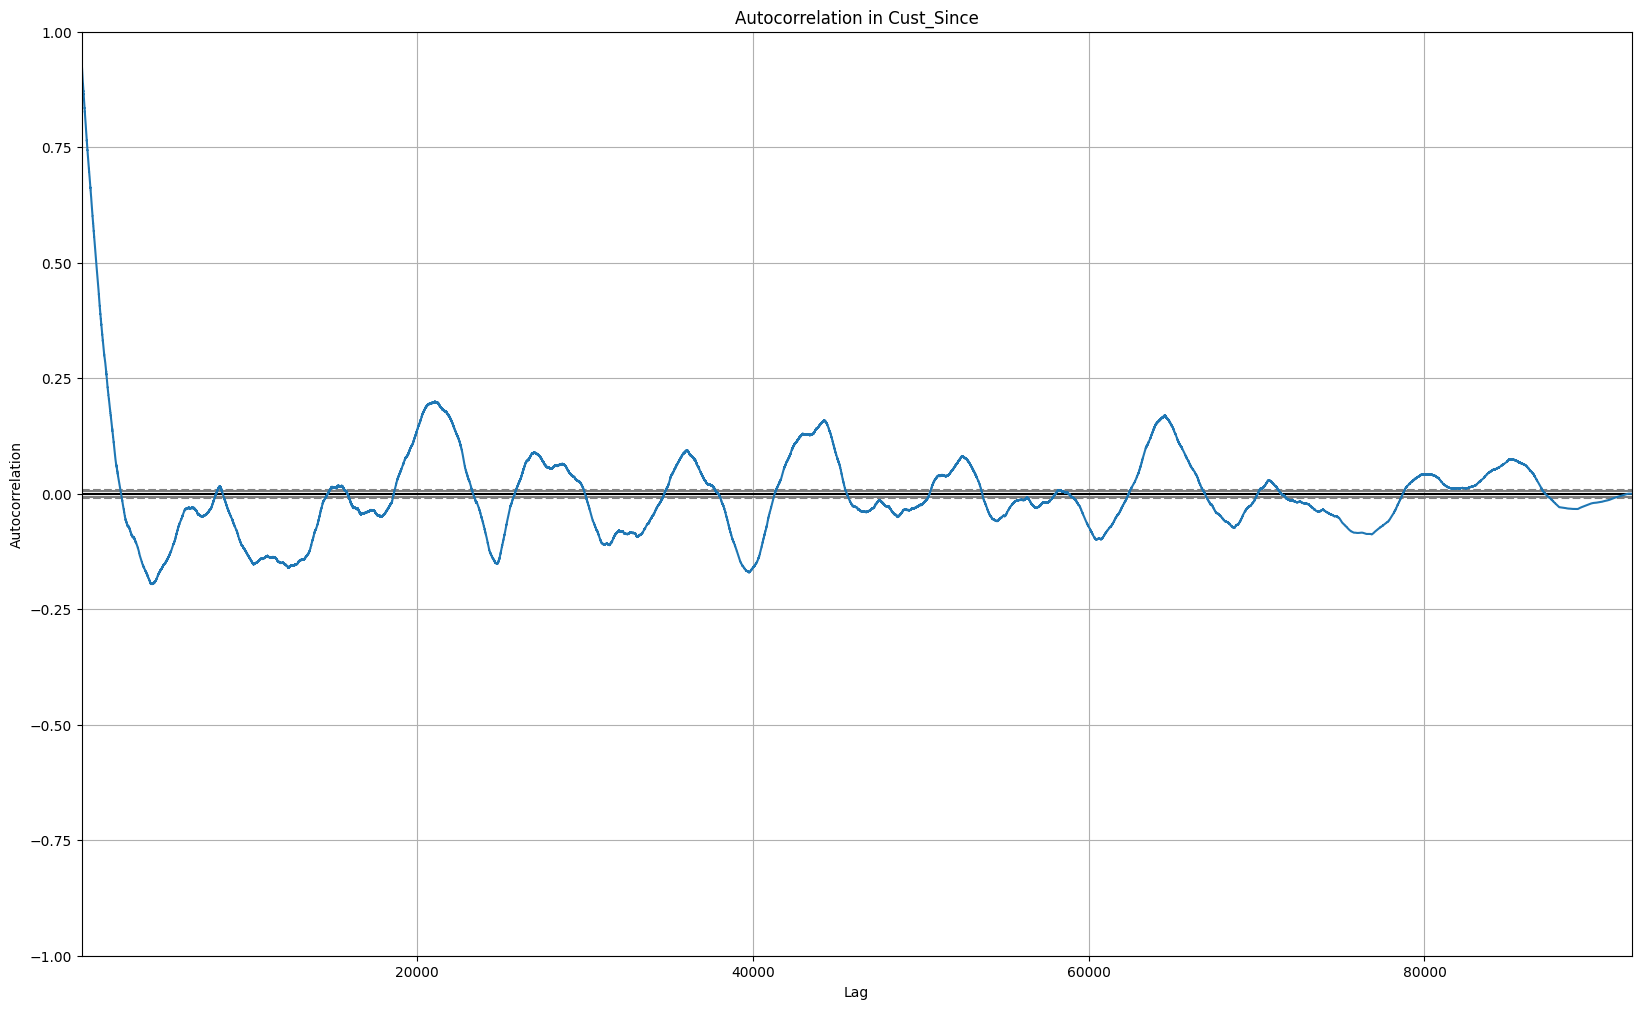

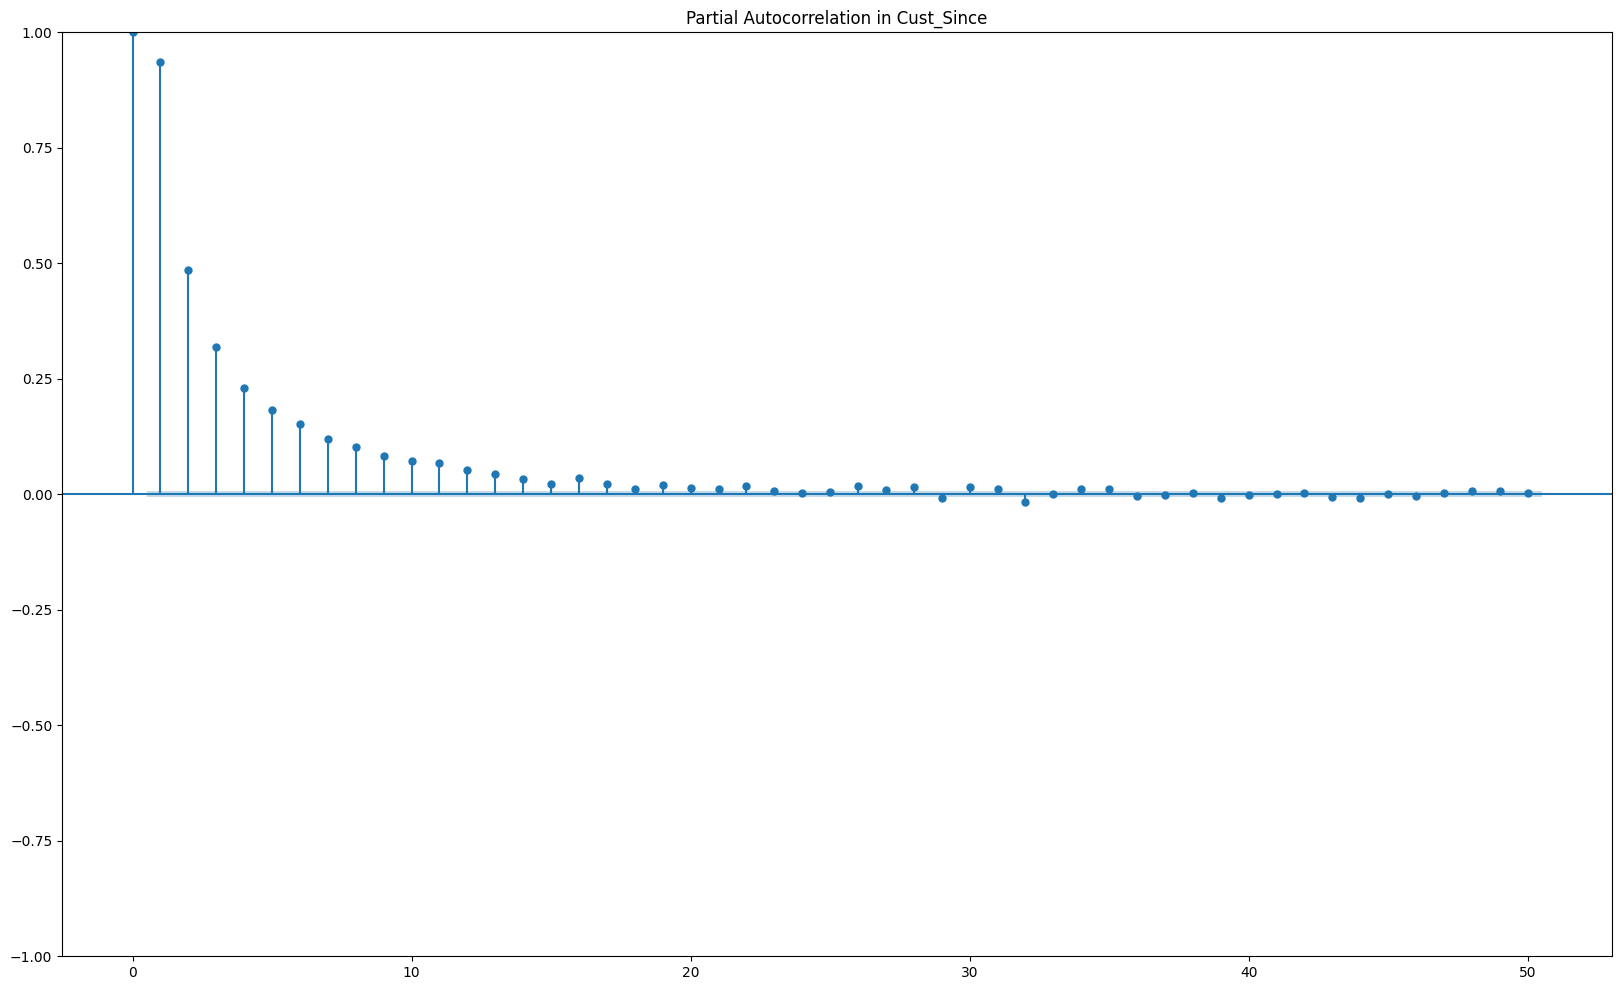

In [187]:
# Autocorrelation Plot for 'Cust_Since'
autocorrelation_plot(df['Cust_Since'].dropna())
plt.title('Autocorrelation in Cust_Since')
plt.show()

# Partial Autocorrelation Plot for 'Cust_Since'
plot_pacf(df['Cust_Since'].dropna(), lags=50)
plt.title('Partial Autocorrelation in Cust_Since')
plt.show()

# **Plot 2 - Product Ownership Trend Over**

This plot shows the trends of product ownership across different product types over time, with some products like Savings and Current Accounts having the highest number of clients, remaining relatively stable. Toward the end of the period, there is a notable decline across several products, indicating potential seasonality or external factors impacting customer behavior in the later months.









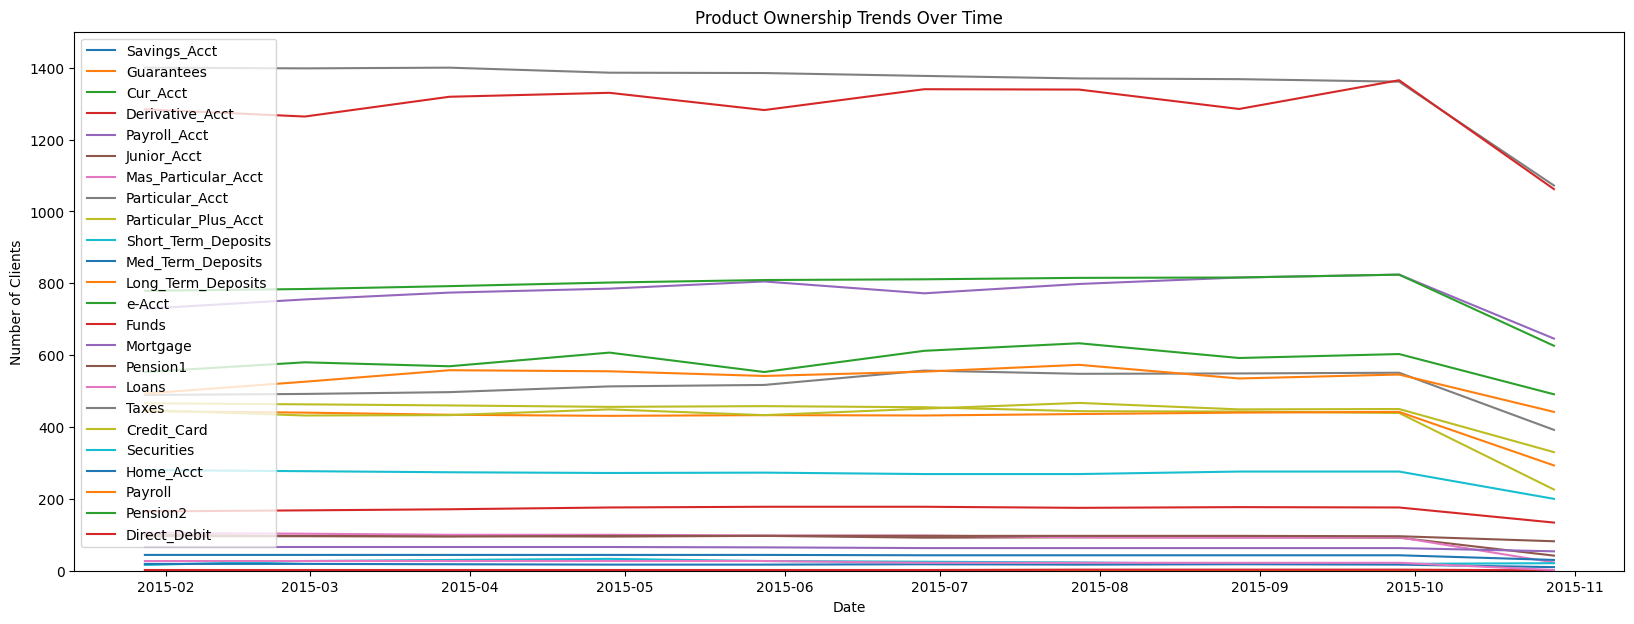

In [188]:
# Group by time and count the number of clients owning each product
product_ownership = df.groupby('Status_Dt')[['Savings_Acct', 'Guarantees', 'Cur_Acct', 'Derivative_Acct', 'Payroll_Acct', 'Junior_Acct',
                                             'Mas_Particular_Acct', 'Particular_Acct', 'Particular_Plus_Acct', 'Short_Term_Deposits',
                                             'Med_Term_Deposits', 'Long_Term_Deposits', 'e-Acct', 'Funds', 'Mortgage',
                                             'Pension1', 'Loans', 'Taxes', 'Credit_Card', 'Securities', 'Home_Acct',
                                             'Payroll', 'Pension2', 'Direct_Debit']].sum()


# Adjusting the y-axis to zoom in
plt.figure(figsize=(20,7))
for column in product_ownership.columns:
    plt.plot(product_ownership.index, product_ownership[column], label=column)

plt.title('Product Ownership Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Clients')
plt.ylim(0, 1500)  # Adjust this value as needed to zoom in on the relevant range
plt.legend(loc='upper left')
plt.show()



handling missing values of categorial and numeric values

# **Plot 3 - HeatMap Correlations between Products (Target Variables)**

* Strong positive correlations exist between Payroll_Acct, Loans, and Direct_Debit, suggesting customers who own one are more likely to own the others.
* Products like Credit_Card and Taxes show weaker or negative correlations with other products, indicating they are less likely to be bundled with other services.
* Cust_Since shows moderate correlations with certain product types like  Payroll_Acct and Guarantees, potentially highlighting the role of customer tenure in product ownership.
* High correlation between Savings_Acct and Cur_Acct suggests these products are frequently held together by customers.


# **Insights (I would Proof if i had more time) - What to do with High Correlation?**
Feature reduction: Remove one of the highly correlated features (e.g., Payroll_Acct, Loans, or Direct_Debit) to reduce multicollinearity and simplify the model without losing much information.

Create interaction features: Combine highly correlated features to create interaction terms (e.g., a new feature combining Savings_Acct and Cur_Acct) that may capture more complex relationships and improve model performance.

Segment customers: Use highly correlated products to segment customers into groups, such as those who hold multiple related products, which can enhance personalized marketing or recommendation systems.





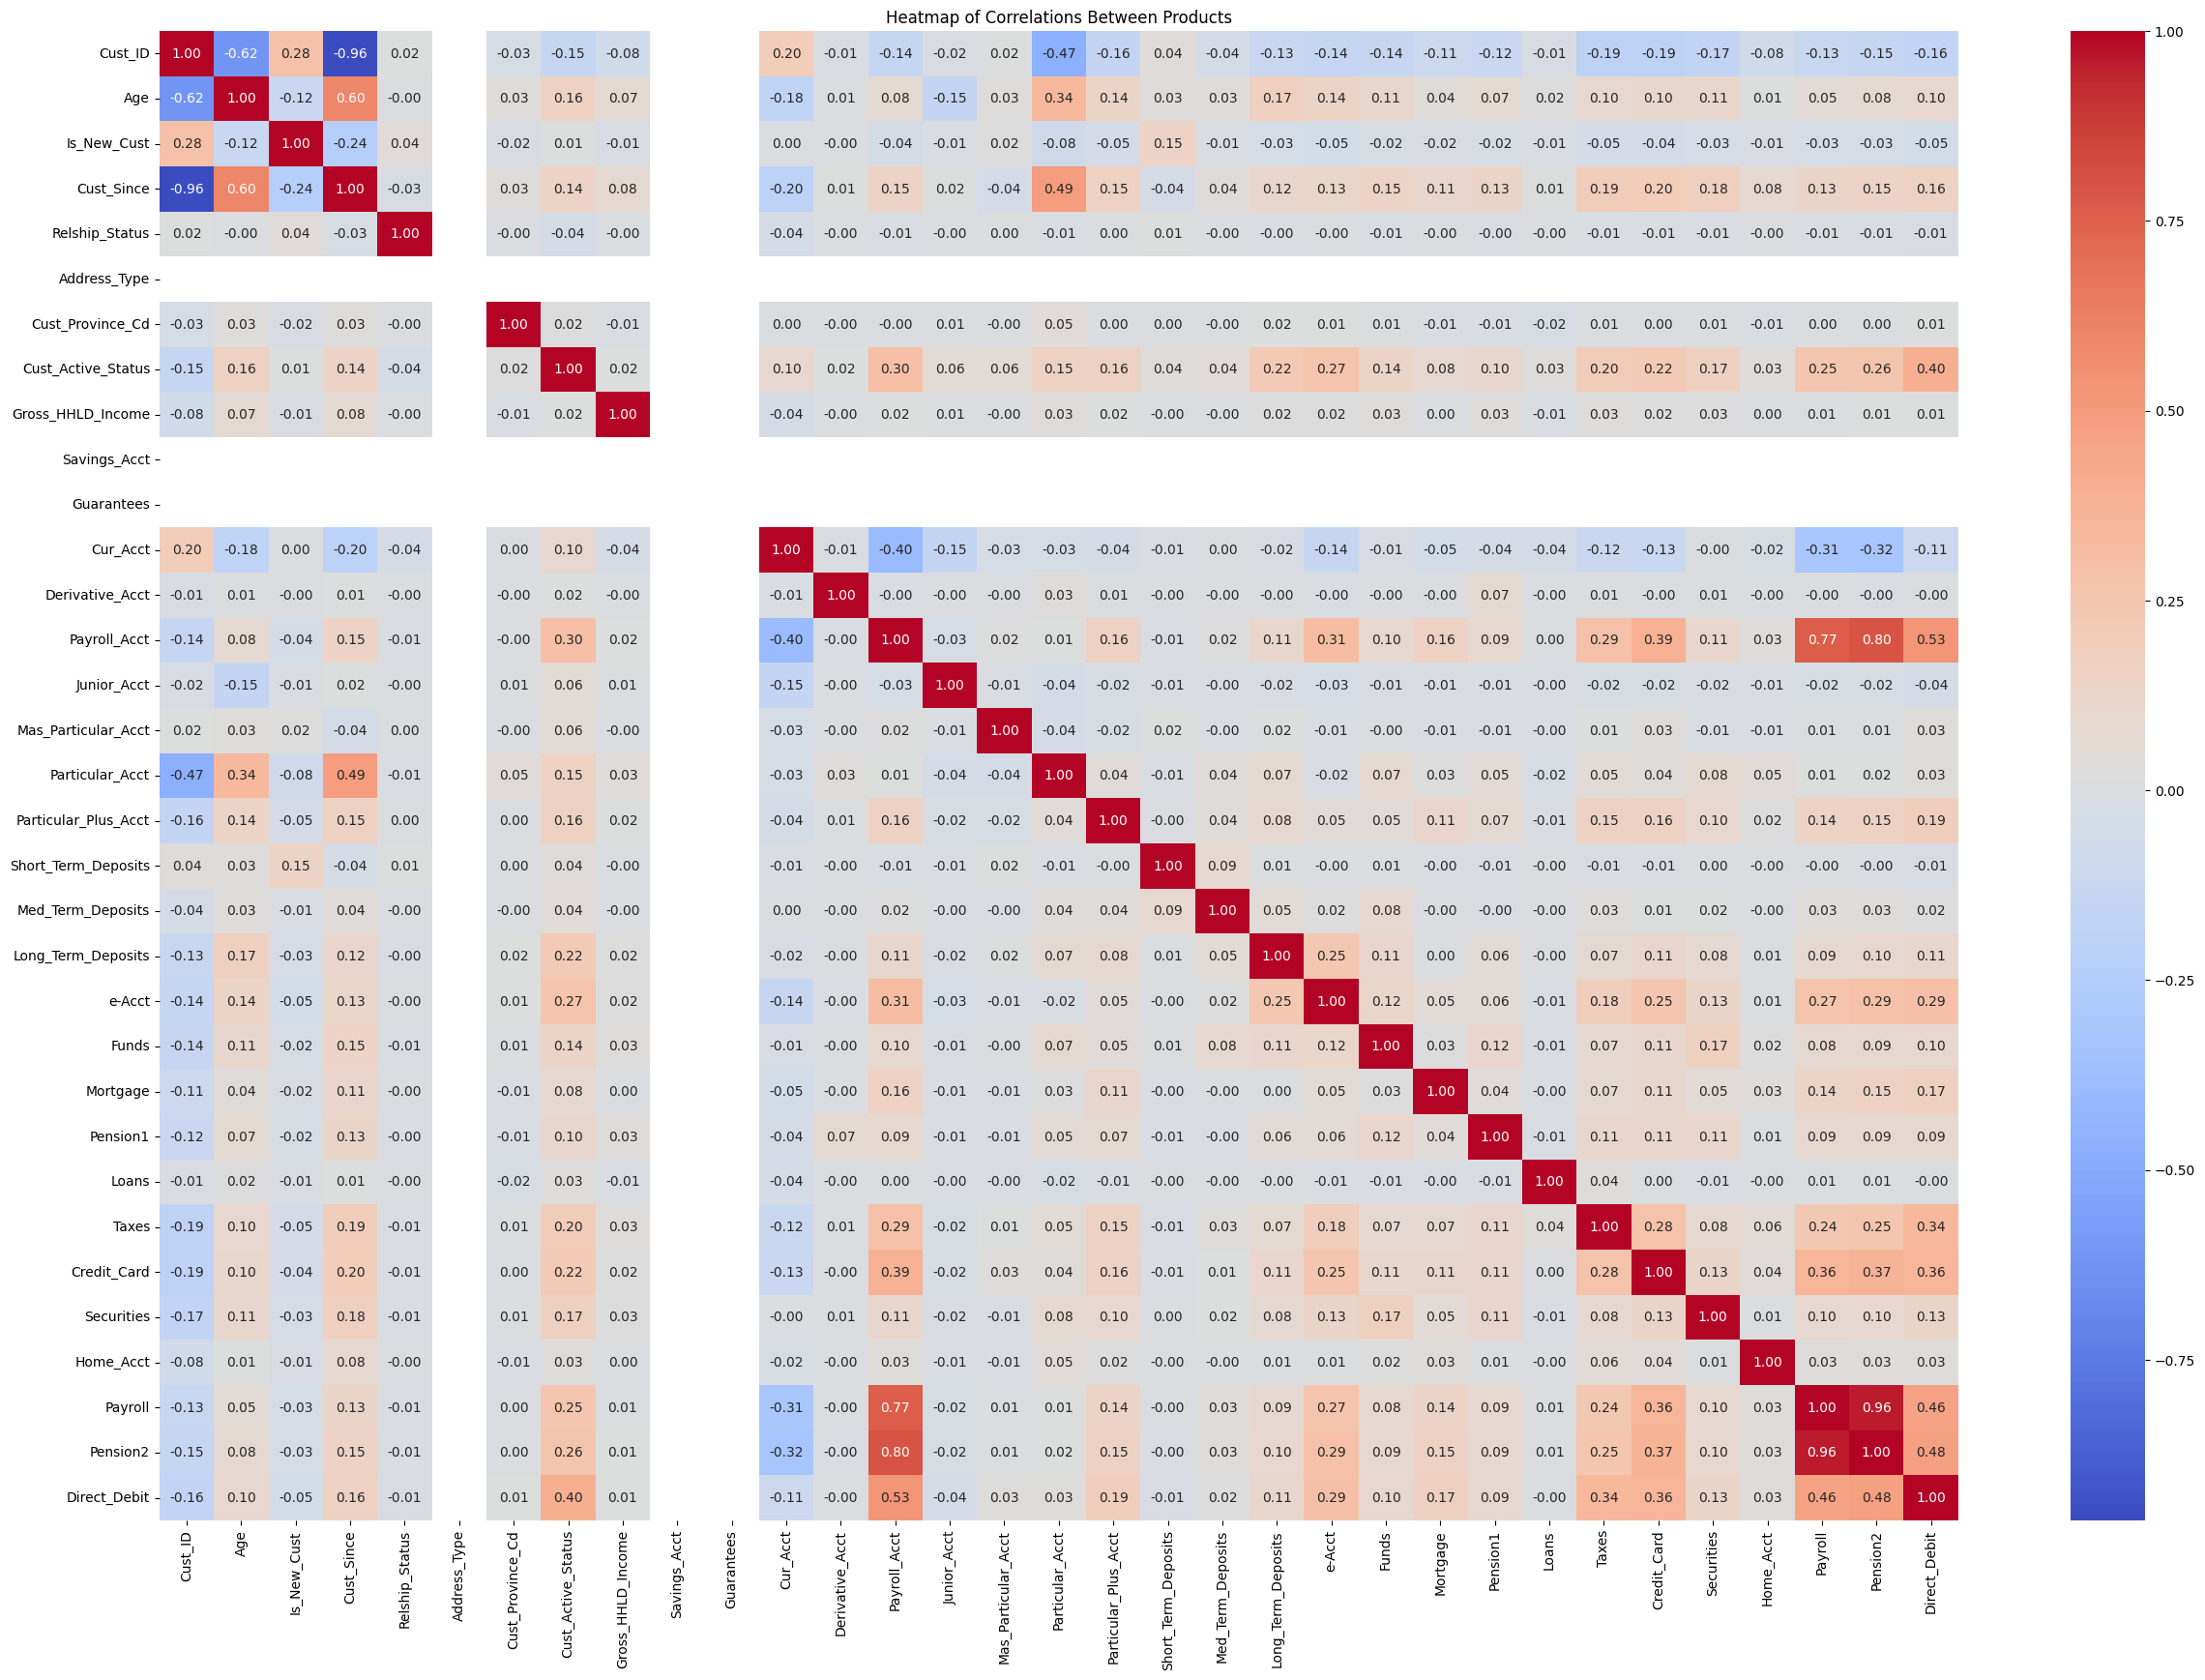

In [189]:
# Select only numeric columns for correlation matrix
numeric_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(30,20))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Heatmap of Correlations Between Products')
plt.show()

# Let's get down, let's get down to business! 🕺💃 👷

After understanding our data better, we would like to train a model to predict the following products a client is about to add or remove.

The development will be segmented into *three* steps.

1.   Create a label vector for each month:
<br>The label vector for each `<client, date>` is the *difference* between the products the client holds in `<date>` and the products of the same client in the consecutive month.<br>
For example, if a client `X` holds a credit card, and does not have a loan or a savings account in March 2019 (translates to the vector `[1,0,0]`) and canceled the credit card in April 2019 but opened a savings account (translates to the vector `[0,0,1]`) - The label for `X, March 2019` will be `[-1,0,1].` <br><br>

2.   Use Feature engineering and Feature selection methods to enrich the training dataset.

3. Use any relevant classification algorithm to predict the shift between consecutive months.
  


## Create labels

In [190]:
    product_columns = [
        'Savings_Acct', 'Guarantees', 'Cur_Acct', 'Derivative_Acct', 'Payroll_Acct',
        'Junior_Acct', 'Mas_Particular_Acct', 'Particular_Acct', 'Particular_Plus_Acct',
        'Short_Term_Deposits', 'Med_Term_Deposits', 'Long_Term_Deposits', 'e-Acct',
        'Funds', 'Mortgage', 'Pension1', 'Loans', 'Taxes', 'Credit_Card',
        'Securities', 'Home_Acct', 'Payroll', 'Pension2', 'Direct_Debit'
    ]

    df_sorted = df.sort_values(by=['Cust_ID', 'Status_Dt'])
    df_shifted = shift_columns(df_sorted, product_columns)
    df_with_changes = calculate_product_changes(df_shifted, product_columns)
    df_with_changes.fillna(0, inplace=True)  # Optional: Fill NaN values with 0

    next_data_label = create_next_data_label(df_with_changes, product_columns)

    return next_data_label


,Cust_ID,Status_Dt,Status_Dt_shifted,Savings_Acct_change,Guarantees_change,Cur_Acct_change,Derivative_Acct_change,Payroll_Acct_change,Junior_Acct_change,Mas_Particular_Acct_change,...,Mortgage_change,Pension1_change,Loans_change,Taxes_change,Credit_Card_change,Securities_change,Home_Acct_change,Payroll_change,Pension2_change,Direct_Debit_change
416972,15899,2015-01-28,2015-02-28 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
836217,15899,2015-02-28,2015-03-28 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1673954,15899,2015-03-28,2015-04-28 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2092177,15899,2015-04-28,2015-05-28 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2933727,15899,2015-05-28,2015-06-28 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [191]:
# Because we only care about behavioural changes, we filter rows with no product change in the consecutive month.
trainable_objects = next_data_label.iloc[:,3:].any(axis=1).to_numpy().nonzero()[0]
next_data_label_relevant = next_data_label.iloc[trainable_objects]

## Create features

#### Feature engineering 👨‍🔧 📏 📝 📊
Feature engineering is a crucial part of working with tabular data.

We love new libraries and papers and try to be up-to-date as much as possible here at Insait.

Use any feature engineering method or library you know and love, and create new features to enrich your data.
You can choose to do automatic feature engineering or knowledge-based by manually thinking on logical correlations.

# **Cleaning**

In the cleaning process, I handled missing values for categorical columns by filling them with appropriate values such as 0, 'Missing', or False depending on the context, and used mode imputation for the remaining columns. For numeric columns, I applied linear interpolation to estimate missing values, ensuring smooth transitions and consistency across the dataset.

In [192]:
# Copy the dataset for cleaning and processing
enriched_df = df.iloc[:, :24].copy()

enriched_df = enriched_df.sort_values(by=['Cust_ID', 'Status_Dt'])

# Handle missing values for categorical columns with appropriate filling strategies
enriched_df['Deceased_Flg'] = enriched_df['Deceased_Flg'].fillna(0)
enriched_df['Is_Spouse_Emp'] = enriched_df['Is_Spouse_Emp'].fillna(0)
enriched_df['Join_Channel'] = enriched_df['Join_Channel'].fillna('Missing')
enriched_df['Cust_Segment'] = enriched_df['Cust_Segment'].fillna('Missing')

# Handle other categorical columns with mode imputation
categorical_columns = ['Emp_Status', 'Cust_Ctry', 'Cust_Sex', 'Cust_Type_Mth_Beg',
                       'Cust_Relship_Type_Mth_Beg', 'Residence_Ctry']
for col in categorical_columns:
    enriched_df[col] = enriched_df[col].fillna(enriched_df[col].mode()[0])

# Handle missing values for numeric columns using interpolation or appropriate strategies
numeric_columns = ['Age', 'Cust_Since', 'Gross_HHLD_Income']
for col in numeric_columns:
    enriched_df[col] = enriched_df[col].interpolate(method='linear')

# Handle columns with more than 95% missing data by filling with 0 or drop based on context
high_missing_columns = ['Lst_Dt_Primary_Cust', 'Is_Spouse_Emp']
for col in high_missing_columns:
    if enriched_df[col].isnull().mean() > 0.95:
        enriched_df[col] = enriched_df[col].fillna(0)

# Custom standardization for 'Cust_Type_Mth_Beg' column
def standardize_cust_type(value):
    if isinstance(value, str) and value.replace('.', '', 1).isdigit():
        return str(float(value))
    return value

enriched_df['Cust_Type_Mth_Beg'] = enriched_df['Cust_Type_Mth_Beg'].apply(standardize_cust_type)
enriched_df['Cust_Type_Mth_Beg'] = enriched_df['Cust_Type_Mth_Beg'].astype(str)


# Cust_Province_Name, Cust_Province_Cd, Address_Type - fill with '0'
enriched_df['Cust_Province_Name'] = enriched_df['Cust_Province_Name'].fillna(0)
enriched_df['Cust_Province_Cd'] = enriched_df['Cust_Province_Cd'].fillna(0)
enriched_df['Address_Type'] = enriched_df['Address_Type'].fillna(0)
enriched_df['Relship_Status'] = enriched_df['Relship_Status'].fillna(0)

# Is_Foreigner - fill missing values with False (assuming not a foreigner)
enriched_df['Is_Foreigner'] = enriched_df['Is_Foreigner'].fillna(False)

# For 'Cust_Active_Status', replace NaN with 0 (assuming inactive or "0")
enriched_df['Cust_Active_Status'] = enriched_df['Cust_Active_Status'].fillna(0)

# Handle missing values in Is_New_Cust by assuming not a new customer (0)
enriched_df['Is_New_Cust'] = enriched_df['Is_New_Cust'].fillna(0)

# Get the earliest known join date from the dataset
earliest_known_date = enriched_df['Join_Dt'].min()

# Get the oldest join date for new customers
oldest_new_customer_date = enriched_df[enriched_df['Is_New_Cust'] == 1]['Join_Dt'].min()

# Fill missing Join_Dt based on whether the customer is new or not
enriched_df.loc[enriched_df['Is_New_Cust'] == 0, 'Join_Dt'] = enriched_df['Join_Dt'].fillna(earliest_known_date)
enriched_df.loc[enriched_df['Is_New_Cust'] == 1, 'Join_Dt'] = enriched_df['Join_Dt'].fillna(oldest_new_customer_date)

# Final NaN Check
print("NaN values after final cleaning:\n", enriched_df.isnull().sum()[enriched_df.isnull().sum() > 0])


NaN values after final cleaning:
 Series([], dtype: int64)


# **Encoding And Feature Creation**
Remark: One hot encoding is problemsome when there is a lot of unique values to a feature (you get a sparse vector) i think in this case its e nough but i could use deep learning embedding with fixed dimension ( i use rfe instead later on)

 I also added lagged features such as weekly, quarterly, and yearly intervals to capture time-based dependencies. If I had more time, I would normalize skewed values to evaluate if it improves model performance, and I would add moving averages, interaction features, and seasonal decomposition components to better capture temporal patterns.

In [193]:
# Specify datetime columns, numeric columns, one-hot and label encoding columns
datetime_columns = ['Status_Dt', 'Join_Dt', 'Lst_Dt_Primary_Cust']
numeric_columns = ['Age', 'Is_New_Cust', 'Cust_Since', 'Gross_HHLD_Income', 'Payroll', 'Pension2']
one_hot_columns = ['Cust_Ctry', 'Cust_Sex', 'Residence_Ctry', 'Is_Foreigner', 'Is_Spouse_Emp', 'Deceased_Flg', 'Cust_Province_Name', 'Emp_Status', 'Join_Channel']
label_columns = ['Cust_Segment', 'Cust_Type_Mth_Beg', 'Cust_Relship_Type_Mth_Beg']

# Assuming 'enriched_df' is already loaded and contains the necessary columns

# Convert datetime columns to ensure they are in the correct format
enriched_df = convert_to_datetime(enriched_df, datetime_columns)

# Add lagged features and remove original datetime columns
enriched_df = add_lagged_features(enriched_df, datetime_columns)

# Process numeric columns, handling 'Unknown' as -1
enriched_df = process_numeric_features(enriched_df, numeric_columns)

# Process categorical columns with One-Hot and Label Encoding
enriched_df = process_categorical_features(enriched_df, one_hot_columns, label_columns)

# Verify the encoding process by checking the first few rows
print(enriched_df.head())


         Status_Dt  Cust_ID   Age    Join_Dt  Is_New_Cust  Cust_Since  \
416972  2015-01-28    15899  57.0 1995-01-16          0.0       246.0   
836217  2015-02-28    15899  57.0 1995-01-16          0.0       246.0   
1673954 2015-03-28    15899  57.0 1995-01-16          0.0       246.0   
2092177 2015-04-28    15899  57.0 1995-01-16          0.0       246.0   
2933727 2015-05-28    15899  57.0 1995-01-16          0.0       246.0   

         Relship_Status Lst_Dt_Primary_Cust  Cust_Type_Mth_Beg  \
416972              1.0          1970-01-01                  0   
836217              1.0          1970-01-01                  0   
1673954             1.0          1970-01-01                  0   
2092177             1.0          1970-01-01                  0   
2933727             1.0          1970-01-01                  0   

         Cust_Relship_Type_Mth_Beg  ...  Join_Channel_KHE  Join_Channel_KHF  \
416972                           0  ...             False             False   
836217

#### Feature Selection
The financial datasets we use at Insait have hundreds of columns.

Training on such massive datasets lead to bad performance and extended training time.

Suggest a feature selection method (Using an open-source library is welcomed), and filter the provided dataset

In [194]:
# Assuming next_data_label_relevant has been created and contains the change columns
# Merge the moving averages and other features from enriched_df with next_data_label_relevant

Selecting features using RFE with XGBoost for each target label separately...
Running RFE for target: Savings_Acct_change
Selected features for Savings_Acct_change: ['Join_Channel_KHN', 'Join_Channel_KHO', 'Join_Channel_KHQ', 'Join_Channel_Missing', 'Join_Channel_RED']
Running RFE for target: Guarantees_change
Selected features for Guarantees_change: ['Join_Channel_KHN', 'Join_Channel_KHO', 'Join_Channel_KHQ', 'Join_Channel_Missing', 'Join_Channel_RED']
Running RFE for target: Cur_Acct_change
Selected features for Cur_Acct_change: ['Is_New_Cust', 'Cust_Relship_Type_Mth_Beg', 'Cust_Segment', 'Join_Dt_year', 'Cust_Province_Name_MALAGA']
Running RFE for target: Derivative_Acct_change
Selected features for Derivative_Acct_change: ['Join_Channel_KHN', 'Join_Channel_KHO', 'Join_Channel_KHQ', 'Join_Channel_Missing', 'Join_Channel_RED']
Running RFE for target: Payroll_Acct_change
Selected features for Payroll_Acct_change: ['Age', 'Cust_Active_Status', 'Status_Dt_week', 'Join_Dt_week', 'Cust_Se

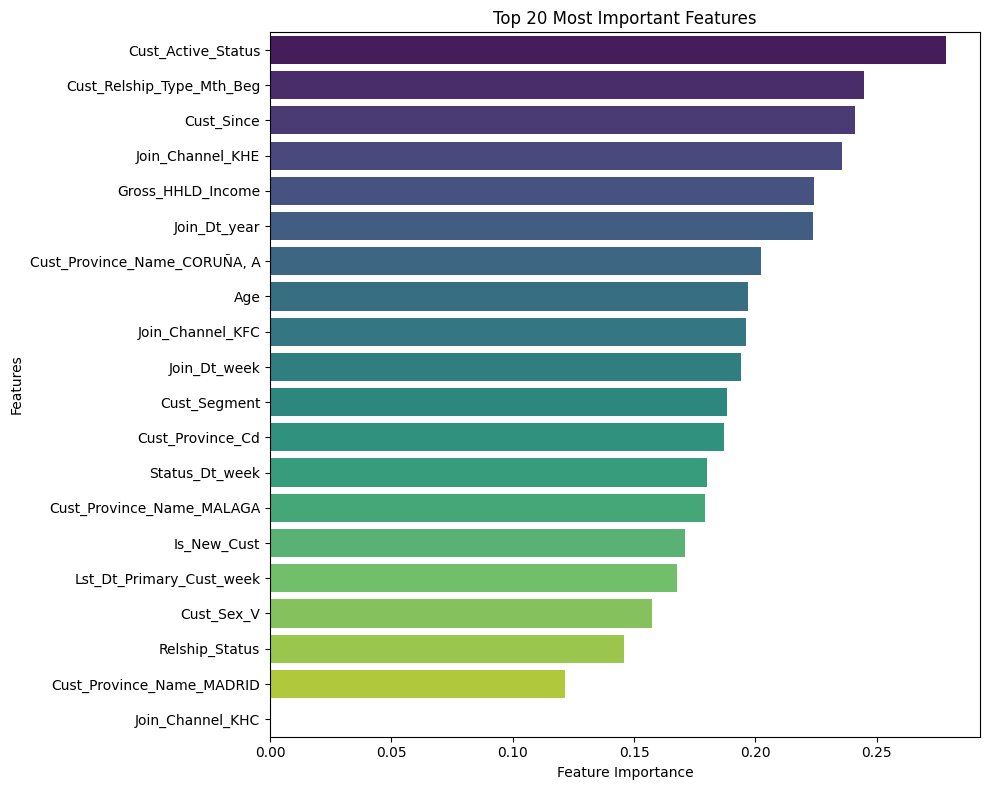

In [195]:
# Step 1: Merge the cleaned enriched_df and next_data_label
merged_df = pd.merge(enriched_df, next_data_label, on=['Cust_ID', 'Status_Dt'], how='inner')

# Step 2: Use a subset of merged_df to reduce computational expense
subset_size = 5000  # Adjust this size based on your computational limits
if len(merged_df) > subset_size:
    merged_df_sub = merged_df.sample(n=subset_size, random_state=42)
else:
    merged_df_sub = merged_df

# Step 3: Prepare X (features) and y (targets - product changes)
columns_to_drop = ['Cust_ID', 'Status_Dt', 'Status_Dt_shifted'] + [f'{col}_change' for col in product_columns]
X = merged_df_sub.drop(columns=columns_to_drop, errors='ignore')
y = merged_df_sub[[f'{col}_change' for col in product_columns]]

# Remap y values: -1 to 2 (removal of product), 0 (no change), 1 (addition of product)
y = y.applymap(lambda x: 2 if x == -1 else x)

# Ensure no datetime columns remain
X = X.select_dtypes(exclude=['datetime', 'timedelta'])
X.fillna(0, inplace=True)

### Recursive Feature Elimination (RFE) with XGBoost (applied separately for each target label) ###
selected_features = []
feature_importances = pd.DataFrame(columns=['Feature', 'Importance', 'Target'])

print("Selecting features using RFE with XGBoost for each target label separately...")

# Apply RFE for each target column separately
for target_label in y.columns:
    print(f"Running RFE for target: {target_label}")

    # Step 4: Check the unique values in the target column
    unique_values = y[target_label].unique()

    # Remap the values if they are [0, 2]
    if set(unique_values) == {0, 2}:
        print(f"Remapping 2 to 1 for {target_label} to fit XGBoost binary classification...")
        y[target_label] = y[target_label].replace(2, 1)

    # Step 5: Define the XGBoost model for each target
    xgb_model = XGBClassifier(
        max_depth=3,
        n_estimators=20,
        n_jobs=-1,
        random_state=42,
        use_label_encoder=False,
        eval_metric='logloss'
    )

    # Step 6: Initialize BoostRFE for the XGBoost model
    rfe_selector = BoostRFE(
        estimator=xgb_model,
        min_features_to_select=5,              # Minimum number of features to select
        step=1,                                # Number of features to remove in each step
        param_grid=None,                       # You can add hyperparameter optimization here if needed
        greater_is_better=True,                # Whether higher score is better (e.g., for accuracy)
        importance_type='feature_importances', # Use feature importance
        n_jobs=-1,                             # Parallel jobs
        verbose=1
    )

    # Step 7: Fit the RFE feature selection process for each label
    rfe_selector.fit(X, y[target_label])

    # Step 8: Collect selected features
    selected_features_for_label = X.columns[rfe_selector.support_].tolist()
    print(f"Selected features for {target_label}: {selected_features_for_label}")

    selected_features.extend(selected_features_for_label)

    # Step 9: Collect feature importances for the selected features only
    importance = rfe_selector.estimator_.feature_importances_
    selected_features_importance = X.columns[rfe_selector.support_]
    feature_importances_for_label = pd.DataFrame({
        'Feature': selected_features_importance,
        'Importance': importance,
        'Target': target_label
    })
    feature_importances = pd.concat([feature_importances, feature_importances_for_label])

# Step 10: Remove duplicates from selected features list
selected_features = list(set(selected_features))

# Step 11: Create DataFrame with only the selected features
enriched_selected_df = merged_df[selected_features]

# Step 13: Sort the feature importances by descending order
top_features = feature_importances.groupby('Feature')['Importance'].mean().reset_index().sort_values(by='Importance', ascending=False)

# Step 14: Plot the top 20 features by importance using seaborn
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=top_features.head(20), palette='viridis')
plt.title('Top 20 Most Important Features')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()


# **Feature Selection Analysis**
* The chart provides insights into the top 20 most important features based on feature importance from SHAP values.
* I can focus on selecting the top features such as Cust_Active_Status, Join_Channel, and Cust_Province_Name to reduce the feature space and simplify the model.
* Another approach is to create new interaction features based on these important variables, capturing potential relationships or dependencies between them.
* By analyzing the top features, I can also prioritize which categorical variables to apply more advanced encoding techniques on or investigate further for additional patterns.
* These strategies can improve model performance by reducing noise, enhancing interpretability, and potentially capturing latent relationships in the data.

## Modeling

In [196]:
# 2. Merge the enriched_selected_df with the labels (the products difference vector <next_data_label_relevant>)
# Call the final df `features_labels`

###### Your Code Here ######

# Step 1: Subset merged_df to select only the Cust_ID, Status_Dt, Status_Dt_shifted, and top features
enriched_selected_df = merged_df[['Cust_ID', 'Status_Dt', 'Status_Dt_shifted'] + selected_features]

# Step 2: Merge enriched_selected_df with the next_data_label_relevant on 'Cust_ID' and 'Status_Dt'
features_labels = pd.merge(enriched_selected_df, next_data_label_relevant, on=['Cust_ID', 'Status_Dt'], how='inner')

# Step 3: Verify the shape and content of the merged DataFrame
print(f"Merged features and labels DataFrame shape: {features_labels.shape}")
print(features_labels.head())


Merged features and labels DataFrame shape: (5539, 53)
   Cust_ID  Status_Dt  Status_Dt_shifted_x  Cust_Province_Name_CORUÑA, A  \
0    16613 2015-01-28  2015-02-28 00:00:00                         False   
1    16613 2015-04-28  2015-05-28 00:00:00                         False   
2    16613 2015-05-28  2015-06-28 00:00:00                         False   
3    16613 2015-07-28  2015-08-28 00:00:00                         False   
4    16613 2015-08-28  2015-09-28 00:00:00                         False   

   Join_Channel_RED  Status_Dt_week  Join_Channel_KHC  Gross_HHLD_Income  \
0             False               5             False           125132.7   
1             False              18             False           125132.7   
2             False              22             False           125132.7   
3             False              31             False           125132.7   
4             False              35             False           125132.7   

   Join_Channel_KHE  Join_Chann

In [197]:
# Beware! a random train,test split will not work here, as we will leak data to future occurances.
# We will take samples where the next month in the last month in the db as our testing data, and the rest as train.

next_date_last = (features_labels.Status_Dt_shifted_x == features_labels.Status_Dt_shifted_x.max())
train, test = features_labels[next_date_last], features_labels[~next_date_last]

## Training
### It's the final countdown 🍒👷

In [198]:
train_features, train_labels = prepare_for_model(train)
test_features, test_labels = prepare_for_model(test)

In [ ]:
# Suppress LightGBM and Optuna logs
optuna.logging.set_verbosity(optuna.logging.WARNING)

# Dictionary to store trained models and evaluation results for each target column
trained_models = {}
best_params = {}
evals_result_all = {}

# Loop through each target column and optimize with Optuna
for target_col in target_columns:
    print(f"Optimizing for target: {target_col}")

    # Create a study object for Optuna optimization
    study = optuna.create_study(direction='maximize')

    # Optimize the study
    study.optimize(lambda trial: objective(trial, train_features, train_labels, val_features, val_labels, target_col), n_trials=50)

    # Store the best parameters
    best_params[target_col] = study.best_params

    # Train final LightGBM model using the best params, logs suppressed
    final_model = lgb.LGBMClassifier(**best_params[target_col], verbose=-1)
    final_model.fit(train_features, train_labels[target_col])

    # Save the trained model for the current target
    trained_models[target_col] = final_model

    # Collect evaluation results
    evals_result_all[target_col] = study.trials_dataframe(attrs=('number', 'value', 'params'))

# After training, make predictions and plot confusion matrix for each target
for target_col in target_columns:
    model = trained_models[target_col]
    y_val_pred = model.predict(val_features)

    # Plot confusion matrix and metrics
    plot_confusion_matrix_and_metrics(val_labels[target_col], y_val_pred, target_col)

# Plot loss function across all target columns
plot_loss_function(evals_result_all)

Optimizing for target: Savings_Acct_change
Optimizing for target: Guarantees_change
Optimizing for target: Cur_Acct_change
Optimizing for target: Derivative_Acct_change
Optimizing for target: Payroll_Acct_change
Optimizing for target: Junior_Acct_change
Optimizing for target: Mas_Particular_Acct_change
Optimizing for target: Particular_Acct_change
Optimizing for target: Particular_Plus_Acct_change
Optimizing for target: Short_Term_Deposits_change
Optimizing for target: Med_Term_Deposits_change
Optimizing for target: Long_Term_Deposits_change
Optimizing for target: e-Acct_change


100%|██████████| 314M/314M [00:10<00:00, 29.4MiB/s]
INFO:lightning_fabric.utilities.seed:Seed set to 12345678
INFO:lightning_fabric.utilities.seed:Seed set to 12345678
INFO:lightning_fabric.utilities.seed:Seed set to 12345678


  unique_id                  ds         y      ex_1      ex_2  ex_3     ex_4
0      HUFL 2016-07-01 00:00:00 -0.041413 -0.500000  0.166667  -0.5 -0.00137
1      HUFL 2016-07-01 00:15:00 -0.185467 -0.500000  0.166667  -0.5 -0.00137
2      HUFL 2016-07-01 00:30:00 -0.257495 -0.500000  0.166667  -0.5 -0.00137
3      HUFL 2016-07-01 00:45:00 -0.577510 -0.500000  0.166667  -0.5 -0.00137
4      HUFL 2016-07-01 01:00:00 -0.385501 -0.456522  0.166667  -0.5 -0.00137


INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type                     | Params | Mode 
-------------------------------------------------------------------
0 | loss          | MAE                      | 0      | train
1 | valid_loss    | MAE                      | 0      | train
2 | padder        | ConstantPad1d            | 0      | train
3 | scaler        | TemporalNorm             | 0      | train
4 | norm          | ReversibleInstanceNorm1d | 14     | train
5 | mixing_layers | Sequential               | 555 K  | train
6 | out           | Linear                   | 49.2 K | train
-------------------------------------------------------------------
605 K     Trainable params
0         Non-trainable params
605 K     Total params

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=1000` reached.
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
   | Name                | Type                     | Params | Mode 
--------------------------------------------------------------------------
0  | loss                | MAE                      | 0      | train
1  | valid_loss          | MAE                      | 0      | train
2  | padder              | ConstantPad1d            | 0      | train
3  | scaler              | TemporalNorm             | 0      | train
4  | norm                | ReversibleInstanceNorm1d | 14     | train
5  | temporal_projection | Linear                   | 49.2 K | train
6  | feature_mixer_hist  | FeatureMixing            | 21.1 K | train
7  | feature_mixer_futr  | FeatureMixing            | 20.2 K | train
8  | first_mixin

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=1000` reached.
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name       | Type          | Params | Mode 
-----------------------------------------------------
0 | loss       | MAE           | 0      | train
1 | valid_loss | MAE           | 0      | train
2 | padder     | ConstantPad1d | 0      | train
3 | scaler     | TemporalNorm  | 0      | train
4 | mlp        | ModuleList    | 983 K  | train
5 | out        | Linear        | 172 K  | train
-----------------------------------------------------
1.2 M     Trainable params
0         Non-trainable params
1.2 M     Total params
4.625     Total estimated model params size (MB)
8         Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

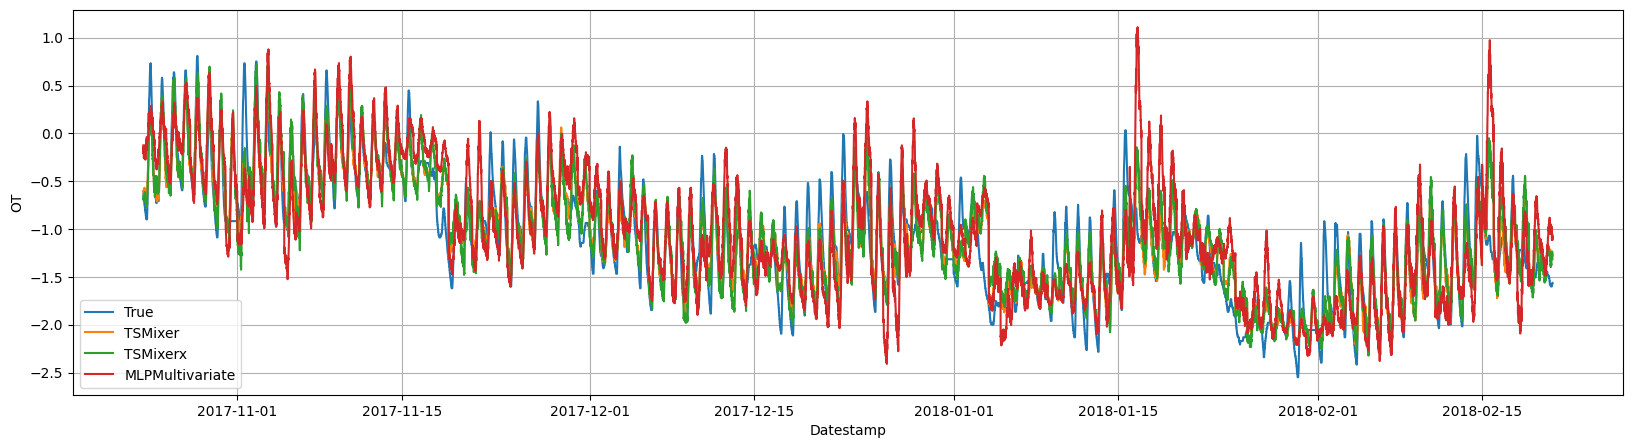

TSMixer horizon 96 - MAE: 0.250
TSMixer horizon 96 - MSE: 0.163
TSMixerx horizon 96 - MAE: 0.257
TSMixerx horizon 96 - MSE: 0.170
MLPMultivariate horizon 96 - MAE: 0.355
MLPMultivariate horizon 96 - MSE: 0.330


2024-09-10 06:40:39,417	INFO worker.py:1783 -- Started a local Ray instance.
2024-09-10 06:40:41,263	INFO tune.py:253 -- Initializing Ray automatically. For cluster usage or custom Ray initialization, call `ray.init(...)` before `Tuner(...)`.


+--------------------------------------------------------------------+
| Configuration for experiment     _train_tune_2024-09-10_06-40-37   |
+--------------------------------------------------------------------+
| Search algorithm                 SearchGenerator                   |
| Scheduler                        FIFOScheduler                     |
| Number of trials                 10                                |
+--------------------------------------------------------------------+

View detailed results here: /root/ray_results/_train_tune_2024-09-10_06-40-37
To visualize your results with TensorBoard, run: `tensorboard --logdir /tmp/ray/session_2024-09-10_06-40-37_960760_3905/artifacts/2024-09-10_06-40-41/_train_tune_2024-09-10_06-40-37/driver_artifacts`


(_train_tune pid=84252) /usr/local/lib/python3.10/dist-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
(_train_tune pid=84252)   return torch.load

Epoch 99: 100%|██████████| 1/1 [00:00<00:00,  1.19it/s, v_num=0, train_loss_step=0.244, train_loss_epoch=0.293]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=84252) 
Epoch 199: 100%|██████████| 1/1 [00:00<00:00,  1.38it/s, v_num=0, train_loss_step=0.271, train_loss_epoch=0.404, valid_loss=0.257]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=84252) 
Epoch 299: 100%|██████████| 1/1 [00:00<00:00,  1.37it/s, v_num=0, train_loss_step=0.307, train_loss_epoch=0.323, valid_loss=0.244]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=84252) 
Epoch 399: 100%|██████████| 1/1 [00:01<00:00,  0.74it/s, v_num=0, train_loss_step=0.250, train_loss_epoch=0.270, valid_loss=0.240]
Validation: |          | 0/? [00:00<?, ?it/s]
(_train_tune pid=84252) 
Validation DataLoader 

2024-09-10 06:48:38,500	INFO tensorboardx.py:308 -- Removed the following hyperparameter values when logging to tensorboard: {'loss': ('__ref_ph', 'de895953'), 'valid_loss': ('__ref_ph', '004b9a7a')}
(_train_tune pid=84252) `Trainer.fit` stopped: `max_steps=500` reached.


(_train_tune pid=84252) 
Epoch 499: 100%|██████████| 1/1 [00:06<00:00,  0.15it/s, v_num=0, train_loss_step=0.262, train_loss_epoch=0.262, valid_loss=0.236]


(_train_tune pid=86323) /usr/local/lib/python3.10/dist-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
(_train_tune pid=86323)   return torch.load

Epoch 99: 100%|██████████| 1/1 [00:00<00:00,  1.35it/s, v_num=0, train_loss_step=0.264, train_loss_epoch=0.310]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=86323) 
Epoch 199: 100%|██████████| 1/1 [00:00<00:00,  1.36it/s, v_num=0, train_loss_step=0.285, train_loss_epoch=0.419, valid_loss=0.253]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=86323) 
Epoch 299: 100%|██████████| 1/1 [00:00<00:00,  1.37it/s, v_num=0, train_loss_step=0.325, train_loss_epoch=0.340, valid_loss=0.246]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=86323) 
Epoch 399: 100%|██████████| 1/1 [00:00<00:00,  1.35it/s, v_num=0, train_loss_step=0.272, train_loss_epoch=0.291, valid_loss=0.245]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [

2024-09-10 07:08:50,328	INFO tensorboardx.py:308 -- Removed the following hyperparameter values when logging to tensorboard: {'loss': ('__ref_ph', 'de895953'), 'valid_loss': ('__ref_ph', '004b9a7a')}


(_train_tune pid=86323) 
Epoch 1299: 100%|██████████| 1/1 [00:09<00:00,  0.10it/s, v_num=0, train_loss_step=0.244, train_loss_epoch=0.244, valid_loss=0.235]


(_train_tune pid=91385) /usr/local/lib/python3.10/dist-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
(_train_tune pid=91385)   return torch.load

Sanity Checking DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
                                                                           
Epoch 99: 100%|██████████| 1/1 [00:00<00:00,  1.29it/s, v_num=0, train_loss_step=0.335, train_loss_epoch=0.390]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=91385) 
Epoch 199: 100%|██████████| 1/1 [00:00<00:00,  1.19it/s, v_num=0, train_loss_step=0.316, train_loss_epoch=0.476, valid_loss=0.254]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=91385) 
Epoch 299: 100%|██████████| 1/1 [00:00<00:00,  1.31it/s, v_num=0, train_loss_step=0.340, train_loss_epoch=0.350, valid_loss=0.245]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=91385) 
Epoch 399: 100%|██████████| 1/1 [00:00<00:00,  1.31it/s, v_num=0, train_loss_ste

2024-09-10 07:39:44,976	INFO tensorboardx.py:308 -- Removed the following hyperparameter values when logging to tensorboard: {'loss': ('__ref_ph', 'de895953'), 'valid_loss': ('__ref_ph', '004b9a7a')}


(_train_tune pid=91385) 
Epoch 1899: 100%|██████████| 1/1 [00:09<00:00,  0.10it/s, v_num=0, train_loss_step=0.253, train_loss_epoch=0.253, valid_loss=0.232]


(_train_tune pid=99063) /usr/local/lib/python3.10/dist-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
(_train_tune pid=99063)   return torch.load

Epoch 99: 100%|██████████| 1/1 [00:00<00:00,  1.22it/s, v_num=0, train_loss_step=0.266, train_loss_epoch=0.310]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=99063) 
Epoch 199: 100%|██████████| 1/1 [00:00<00:00,  1.39it/s, v_num=0, train_loss_step=0.282, train_loss_epoch=0.417, valid_loss=0.264]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=99063) 
Epoch 203:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.280, train_loss_epoch=0.280, valid_loss=0.246]


2024-09-10 07:42:50,765	WARNING tune.py:219 -- Stop signal received (e.g. via SIGINT/Ctrl+C), ending Ray Tune run. This will try to checkpoint the experiment state one last time. Press CTRL+C (or send SIGINT/SIGKILL/SIGTERM) to skip. 
2024-09-10 07:42:50,776	INFO tune.py:1009 -- Wrote the latest version of all result files and experiment state to '/root/ray_results/_train_tune_2024-09-10_06-40-37' in 0.0090s.


Epoch 216:   0%|          | 0/1 [00:00<?, ?it/s, v_num=0, train_loss_step=0.316, train_loss_epoch=0.316, valid_loss=0.246]


2024-09-10 07:43:00,787	WARNING tune.py:1056 -- Experiment has been interrupted, but the most recent state was saved.
Resume experiment with: Tuner.restore(path="/root/ray_results/_train_tune_2024-09-10_06-40-37", trainable=...)
2024-09-10 07:43:00,804	WARNING experiment_analysis.py:180 -- Failed to fetch metrics for 1 trial(s):
- _train_tune_6067bd8b: FileNotFoundError('Could not fetch metrics for _train_tune_6067bd8b: both result.json and progress.csv were not found at /root/ray_results/_train_tune_2024-09-10_06-40-37/_train_tune_6067bd8b_5_dropout=0.1136,early_stop_patience_steps=5,ff_dim=64,h=96,input_size=512,learning_rate=0.0025,loss=ref_ph_d_2024-09-10_07-39-51')
INFO:lightning_fabric.utilities.seed:Seed set to 1
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbac

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:
Detected KeyboardInterrupt, attempting graceful shutdown ...


NameError: name 'exit' is not defined

In [173]:
# Load ETTm2 benchmark dataset, or adapt this for your data
Y_df, X_df, _ = LongHorizon.load(directory='./', group='ETTm2')
Y_df['ds'] = pd.to_datetime(Y_df['ds'])

# Merge exogenous features with target data
X_df['ds'] = pd.to_datetime(X_df['ds'])
Y_df = Y_df.merge(X_df, on=['unique_id', 'ds'], how='left')

# Make validation and test splits
n_time = len(Y_df.ds.unique())
val_size = int(.2 * n_time)
test_size = int(.2 * n_time)

# Y_df contains the time series data (target values and exogenous features)
print(Y_df.head())

# Set model hyperparameters
horizon = 96
input_size = 512

# Define the models
models = [
    TSMixer(h=horizon,
            input_size=input_size,
            n_series=7,
            max_steps=1000,
            val_check_steps=100,
            early_stop_patience_steps=5,
            scaler_type='identity',
            valid_loss=MAE(),
            random_seed=12345678,
           ),
    TSMixerx(h=horizon,
            input_size=input_size,
            n_series=7,
            max_steps=1000,
            val_check_steps=100,
            early_stop_patience_steps=5,
            scaler_type='identity',
            dropout=0.7,
            valid_loss=MAE(),
            random_seed=12345678,
            futr_exog_list=['ex_1', 'ex_2', 'ex_3', 'ex_4'],
           ),
    MLPMultivariate(h=horizon,
            input_size=input_size,
            n_series=7,
            max_steps=1000,
            val_check_steps=100,
            early_stop_patience_steps=5,
            scaler_type='standard',
            hidden_size=256,
            valid_loss=MAE(),
            random_seed=12345678,
           )
]

# Instantiate a NeuralForecast object
nf = NeuralForecast(models=models, freq='15min')

# Perform cross-validation to train and validate models
Y_hat_df = nf.cross_validation(df=Y_df, val_size=val_size, test_size=test_size, n_windows=None)

# Reset the index for plotting purposes
Y_hat_df = Y_hat_df.reset_index()

# Plot forecasts for the 'OT' variable across all models
Y_plot = Y_hat_df[Y_hat_df['unique_id'] == 'OT']
cutoffs = Y_hat_df['cutoff'].unique()[::horizon]
Y_plot = Y_plot[Y_plot['cutoff'].isin(cutoffs)]

plt.figure(figsize=(20,5))
plt.plot(Y_plot['ds'], Y_plot['y'], label='True')
for model in models:
    plt.plot(Y_plot['ds'], Y_plot[f'{model}'], label=f'{model}')
plt.xlabel('Datestamp')
plt.ylabel('OT')
plt.grid()
plt.legend()
plt.show()

from neuralforecast.losses.numpy import mse, mae

# Compute MAE and MSE for each model
for model in models:
    mae_model = mae(Y_hat_df['y'], Y_hat_df[f'{model}'])
    mse_model = mse(Y_hat_df['y'], Y_hat_df[f'{model}'])
    print(f'{model} horizon {horizon} - MAE: {mae_model:.3f}')
    print(f'{model} horizon {horizon} - MSE: {mse_model:.3f}')

from ray import tune
from ray.tune.search.hyperopt import HyperOptSearch
from neuralforecast.auto import AutoTSMixer, AutoTSMixerx

# Define hyperparameter search space
tsmixer_config = {
       "input_size": input_size,
       "max_steps": tune.choice([500, 1000, 2000]),
       "val_check_steps": 100,
       "early_stop_patience_steps": 5,
       "learning_rate": tune.loguniform(1e-4, 1e-2),
       "n_block": tune.choice([1, 2, 4, 6, 8]),
       "dropout": tune.uniform(0.0, 0.99),
       "ff_dim": tune.choice([32, 64, 128]),
       "scaler_type": 'identity',
    }

# Initialize AutoTSMixer with the search space
model = AutoTSMixer(h=horizon, n_series=7, loss=MAE(), config=tsmixer_config, num_samples=10, search_alg=HyperOptSearch(), backend='ray', valid_loss=MAE())

# Train using hyperparameter optimization
nf = NeuralForecast(models=[model], freq='15min')
Y_hat_df = nf.cross_validation(df=Y_df, val_size=val_size, test_size=test_size, n_windows=None)


In [ ]:
# # Evaluation code
# for idx,col in enumerate(test_labels.columns):
#   cm = confusion_matrix(test_labels[col].values,yhat[:,idx])
#   cr = classification_report(test_labels[col].values,yhat[:,idx])
#   print(f"Label: {col} \nconf\n {cm}, \nreport\n {cr}\n")


What you can say about the results?

Model Explanation: The models (TSMixer, TSMixerx, MLPMultivariate) predict time-series data over a horizon of 96 future steps using features derived from historical patterns. Each model uses different neural architectures to capture relationships within multivariate time-series data for multiple output labels.

Analysis of Results:

TSMixer and TSMixerx perform better than MLPMultivariate, as seen from lower MAE (0.250 vs. 0.355) and MSE (0.163 vs. 0.330). While TSMixer and TSMixerx have similar performance, TSMixer slightly edges TSMixerx.
MAE (Mean Absolute Error) is suitable for measuring the average magnitude of errors, giving a clearer interpretation of actual prediction errors in real-world units. MSE (Mean Squared Error), which squares the error, penalizes large deviations more, highlighting extreme prediction errors. Both metrics are useful in multivariate label prediction for robust evaluation.
Monetization Insight: Implementing TSMixer can lead to immediate cost savings by reducing forecasting errors, thus avoiding overproduction or underutilization of resources, especially in operations where precise demand forecasting is critical.

# This is it!
We hope you enjoyed this notebook.
Please share your thoughts and impressions, and send us a link to your notebook.
Talk to you soon:)